In [1]:
from prepare import prep_titanic_data, prep_telco_data, prep_iris_data
import acquire 
import env 
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression



import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from pydataset import data

## Acquire and prep Titanic data 

In [2]:
df = acquire.new_titanic_data()

In [3]:
train, validate, test = prep_titanic_data(df)

Train:(498, 10)
Test:(179, 10)
Val: (214, 10)
Train Titanic Data:
     survived  pclass   age  sibsp  parch      fare  alone  sex_male  \
583         0       1  36.0      0      0   40.1250      1         1   
165         1       3   9.0      0      2   20.5250      0         1   
50          0       3   7.0      4      1   39.6875      0         1   
259         1       2  50.0      0      1   26.0000      0         0   
306         1       1   NaN      0      0  110.8833      1         0   
..        ...     ...   ...    ...    ...       ...    ...       ...   
313         0       3  28.0      0      0    7.8958      1         1   
636         0       3  32.0      0      0    7.9250      1         1   
222         0       3  51.0      0      0    8.0500      1         1   
485         0       3   NaN      3      1   25.4667      0         0   
744         1       3  31.0      0      0    7.9250      1         1   

     embark_town_Queenstown  embark_town_Southampton  
583           

## Create a model that includes only age, fare, and pclass. Does this model perform better than your baseline?

In [4]:
train.columns

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'alone',
       'sex_male', 'embark_town_Queenstown', 'embark_town_Southampton'],
      dtype='object')

In [5]:
X_train = train.drop(columns=['survived','sibsp', 'parch','alone',
       'sex_male', 'embark_town_Queenstown', 'embark_town_Southampton'])
y_train = train.survived

X_validate = validate.drop(columns=['survived','sibsp', 'parch','alone',
       'sex_male', 'embark_town_Queenstown', 'embark_town_Southampton'])
y_validate = validate.survived

X_test = test.drop(columns=['survived','sibsp', 'parch','alone',
       'sex_male', 'embark_town_Queenstown', 'embark_town_Southampton'])
y_test = test.survived


In [6]:
logit = LogisticRegression(C=1, random_state=123)


### Fit

In [7]:
logit.fit(X_train, y_train)


LogisticRegression(C=1, random_state=123)

### Feature Importance

In [8]:
print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)


Coefficient: 
 [[-0.94966047 -0.03063266  0.00141012]]
Intercept: 
 [2.52857789]


### predict

In [9]:
y_pred = logit.predict(X_train)
y_pred[:5]

array([1, 0, 0, 0, 1])

### Probability

In [10]:
y_pred_proba = logit.predict_proba(X_train)
y_pred_proba[:5]

array([[0.36988206, 0.63011794],
       [0.63810638, 0.36189362],
       [0.61748053, 0.38251947],
       [0.70385285, 0.29614715],
       [0.30445826, 0.69554174]])

### baseline

In [11]:
baseline_prediction = y_train.mode()
pd.Series((baseline_prediction[0]), range(len(y_train)))

0      0
1      0
2      0
3      0
4      0
      ..
493    0
494    0
495    0
496    0
497    0
Length: 498, dtype: int64

In [12]:
def establish_baseline(y_train):
    baseline_prediction = y_train.mode()
    y_train_pred = pd.Series((baseline_prediction[0]), range(len(y_train)))

    
    cm = confusion_matrix(y_train, y_train_pred)
    tn, fp, fn, tp = cm.ravel()
    accuracy = (tp+tn)/(tn+fp+fn+tp)
    
    return accuracy

establish_baseline(y_train)

0.6164658634538153

### Accuracy

In [13]:
print('Accuracy of Logistic Regression classifier 1 on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))


Accuracy of Logistic Regression classifier 1 on training set: 0.70


In [14]:
print('Accuracy of Logistic Regression classifier 1 on validation set: {:.2f}'
     .format(logit.score(X_validate, y_validate)))

Accuracy of Logistic Regression classifier 1 on validation set: 0.71


#### MODEL DOES BEAT BASELINE

### Confusion Matrix

In [15]:
cm = confusion_matrix(y_train, y_pred)
cm

array([[266,  41],
       [107,  84]])

### Classification Report

In [16]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.87      0.78       307
           1       0.67      0.44      0.53       191

    accuracy                           0.70       498
   macro avg       0.69      0.65      0.66       498
weighted avg       0.70      0.70      0.69       498



### Visual

In [17]:
y_pred_proba = np.array([i[1] for i in y_pred_proba])

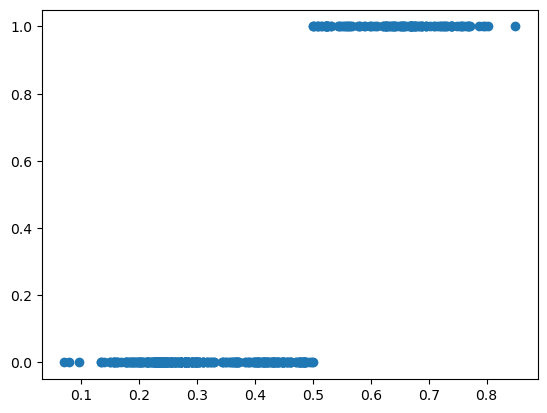

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(y_pred_proba, y_pred)

## Include sex in your model as well. Note that you'll need to encode or create a dummy variable of this feature before including it in a model.

In [19]:
X_train = train.drop(columns=['survived','sibsp', 'parch','alone',
        'embark_town_Queenstown', 'embark_town_Southampton'])
y_train = train.survived

X_validate = validate.drop(columns=['survived','sibsp', 'parch','alone',
       'embark_town_Queenstown', 'embark_town_Southampton'])
y_validate = validate.survived

X_test = test.drop(columns=['survived','sibsp', 'parch','alone',
       'embark_town_Queenstown', 'embark_town_Southampton'])
y_test = test.survived


In [20]:
logit2 = LogisticRegression(C=1, random_state=123)


### Fit

In [21]:
logit2.fit(X_train, y_train)


LogisticRegression(C=1, random_state=123)

### Feature Importance

In [22]:
print('Coefficient: \n', logit2.coef_)
print('Intercept: \n', logit2.intercept_)


Coefficient: 
 [[-1.21051288e+00 -2.97225157e-02 -2.02959641e-03 -2.71607026e+00]]
Intercept: 
 [4.841476]


### predict

In [23]:
y_pred = logit2.predict(X_train)
y_pred[:5]

array([0, 0, 0, 1, 1])

### Probability

In [24]:
y_pred_proba = logit2.predict_proba(X_train)
y_pred_proba[:5]

array([[0.55886457, 0.44113543],
       [0.86000036, 0.13999964],
       [0.85750744, 0.14249256],
       [0.29285566, 0.70714434],
       [0.07420599, 0.92579401]])

### baseline

In [25]:
baseline_prediction = y_train.mode()
pd.Series((baseline_prediction[0]), range(len(y_train)))

0      0
1      0
2      0
3      0
4      0
      ..
493    0
494    0
495    0
496    0
497    0
Length: 498, dtype: int64

In [26]:
def establish_baseline(y_train):
    baseline_prediction = y_train.mode()
    y_train_pred = pd.Series((baseline_prediction[0]), range(len(y_train)))

    
    cm = confusion_matrix(y_train, y_train_pred)
    tn, fp, fn, tp = cm.ravel()
    accuracy = (tp+tn)/(tn+fp+fn+tp)
    
    return accuracy

establish_baseline(y_train)

0.6164658634538153

### Accuracy

In [27]:
print('Accuracy of Logistic Regression classifier 2 on training set: {:.2f}'
     .format(logit2.score(X_train, y_train)))


Accuracy of Logistic Regression classifier 2 on training set: 0.81


In [28]:
print('Accuracy of Logistic Regression classifier 2 on validation set: {:.2f}'
     .format(logit2.score(X_validate, y_validate)))



Accuracy of Logistic Regression classifier 2 on validation set: 0.78


#### MODEL DOES  BEAT BASELINE

### Confusion Matrix

In [29]:
cm = confusion_matrix(y_train, y_pred)
cm

array([[266,  41],
       [ 52, 139]])

### Classification Report

In [30]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       307
           1       0.77      0.73      0.75       191

    accuracy                           0.81       498
   macro avg       0.80      0.80      0.80       498
weighted avg       0.81      0.81      0.81       498



### Visual

In [31]:
y_pred_proba = np.array([i[1] for i in y_pred_proba])

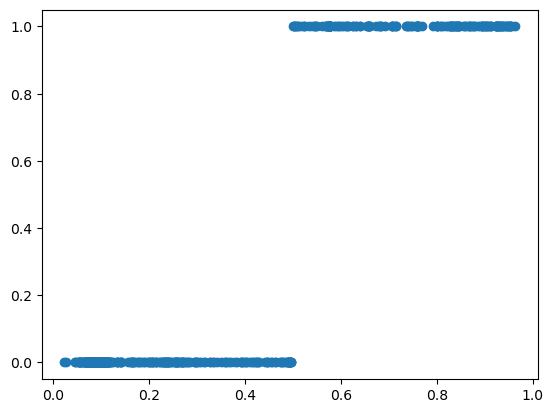

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(y_pred_proba, y_pred)

## Try out other combinations of features and models.

In [33]:
X_train = train.drop(columns=['survived','sibsp', 'parch',
        'embark_town_Queenstown', 'embark_town_Southampton', ])
y_train = train.survived

X_validate = validate.drop(columns=['survived','sibsp', 'parch',
       'embark_town_Queenstown', 'embark_town_Southampton'])
y_validate = validate.survived

X_test = test.drop(columns=['survived','sibsp', 'parch',
       'embark_town_Queenstown', 'embark_town_Southampton'])
y_test = test.survived

In [34]:
logit3 = LogisticRegression(C=1, random_state=123)


### Fit

In [35]:
logit3.fit(X_train, y_train)


LogisticRegression(C=1, random_state=123)

### Feature Importance

In [36]:
print('Coefficient: \n', logit3.coef_)
print('Intercept: \n', logit3.intercept_)


Coefficient: 
 [[-1.21053720e+00 -3.01085199e-02 -1.86898391e-03  4.85890381e-02
  -2.72652073e+00]]
Intercept: 
 [4.82520759]


### predict

In [37]:
y_pred = logit3.predict(X_train)
y_pred[:5]

array([0, 0, 0, 1, 1])

### Probability

In [38]:
y_pred_proba = logit3.predict_proba(X_train)
y_pred_proba[:5]

array([[0.55531293, 0.44468707],
       [0.86321605, 0.13678395],
       [0.8603091 , 0.1396909 ],
       [0.29940902, 0.70059098],
       [0.07159409, 0.92840591]])

### baseline

In [39]:
baseline_prediction = y_train.mode()
pd.Series((baseline_prediction[0]), range(len(y_train)))

0      0
1      0
2      0
3      0
4      0
      ..
493    0
494    0
495    0
496    0
497    0
Length: 498, dtype: int64

In [40]:
def establish_baseline(y_train):
    baseline_prediction = y_train.mode()
    y_train_pred = pd.Series((baseline_prediction[0]), range(len(y_train)))

    
    cm = confusion_matrix(y_train, y_train_pred)
    tn, fp, fn, tp = cm.ravel()
    accuracy = (tp+tn)/(tn+fp+fn+tp)
    
    return accuracy

establish_baseline(y_train)

0.6164658634538153

### Accuracy

In [41]:
logit3score = print('Accuracy of Logistic Regression classifier 3 on training set: {:.2f}'
     .format(logit3.score(X_train, y_train)))


Accuracy of Logistic Regression classifier 3 on training set: 0.81


In [42]:
logit3score = print('Accuracy of Logistic Regression classifier 3 on validation set: {:.2f}'
     .format(logit3.score(X_validate, y_validate)))


Accuracy of Logistic Regression classifier 3 on validation set: 0.77


#### MODEL DOES  BEAT BASELINE

### Confusion Matrix

In [43]:
cm = confusion_matrix(y_train, y_pred)
cm

array([[266,  41],
       [ 54, 137]])

### Classification Report

In [44]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       307
           1       0.77      0.72      0.74       191

    accuracy                           0.81       498
   macro avg       0.80      0.79      0.80       498
weighted avg       0.81      0.81      0.81       498



### Visual

In [45]:
y_pred_proba = np.array([i[1] for i in y_pred_proba])

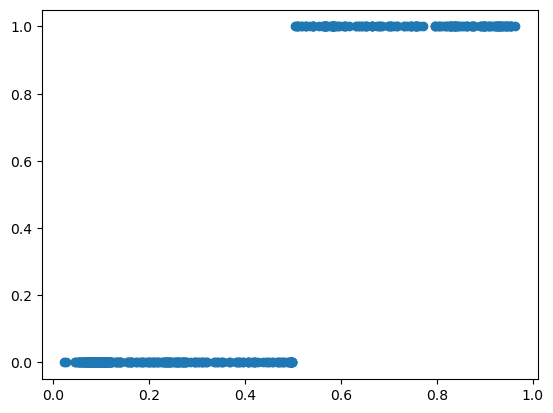

In [46]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(y_pred_proba, y_pred)

## Use your best 3 models to predict and evaluate on your validate sample.

```
Accuracy of Logistic Regression classifier 1 on training set: 0.70
Accuracy of Logistic Regression classifier 1 on validation set: 0.71

Accuracy of Logistic Regression classifier 2 on training set: 0.81
Accuracy of Logistic Regression classifier 2 on validation set: 0.78

Accuracy of Logistic Regression classifier 3 on training set: 0.81
Accuracy of Logistic Regression classifier 3 on validation set: 0.77
```

## Choose your best model from the validation performation, and evaluate it on the test dataset. How do the performance metrics compare to validate? to train?

In [57]:
X_train = train.drop(columns=['survived','sibsp', 'parch','alone',
        'embark_town_Queenstown', 'embark_town_Southampton'])
y_train = train.survived

X_validate = validate.drop(columns=['survived','sibsp', 'parch','alone',
       'embark_town_Queenstown', 'embark_town_Southampton'])
y_validate = validate.survived

X_test = test.drop(columns=['survived','sibsp', 'parch','alone',
       'embark_town_Queenstown', 'embark_town_Southampton'])
y_test = test.survived


In [58]:
logit2 = LogisticRegression(C=1, random_state=123)

In [59]:
logit2.fit(X_train, y_train)

LogisticRegression(C=1, random_state=123)

In [76]:
model_set = []
model_accuracies = []


logi = LogisticRegression(C=1)
logit2.fit(X_train, y_train)
train_score = round(logit2.score(X_train, y_train), 2)
validate_score = round(logit2.score(X_validate, y_validate), 2)
test_score = round(logit2.score(X_test, y_test), 2)
score_difference = train_score - validate_score
testscore_difference = test_score - validate_score
testscore_difference2 = test_score - train_score

model_set.append(logi)
model_accuracies.append({
    'C': 1,
    'train_score': train_score,
    'validate_score': validate_score,
    'test_score': test_score,
    'train/val_difference': score_difference,
    'test/val_difference': testscore_difference,
    'test/train_difference': testscore_difference2

})


In [77]:
pd.DataFrame(model_accuracies)

,C,train_score,validate_score,test_score,train/val_difference,test/val_difference,test/train_difference
0,1,0.81,0.78,0.8,0.03,0.02,-0.01
